In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import FreqDist
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

In [2]:
file1 = "E:/WowAI/Song lyrics trial/csv/ArianaGrande.csv"   
file2 = "E:/WowAI/Song lyrics trial/csv/Beyonce.csv"
file3 = "E:/WowAI/Song lyrics trial/csv/BillieEilish.csv"
file4 = "E:/WowAI/Song lyrics trial/csv/BTS.csv"
file5 = "E:/WowAI/Song lyrics trial/csv/CardiB.csv"
file6 = "E:/WowAI/Song lyrics trial/csv/CharliePuth.csv"
file7 = "E:/WowAI/Song lyrics trial/csv/ColdPlay.csv"
file8 = "E:/WowAI/Song lyrics trial/csv/Drake.csv"
file9 = "E:/WowAI/Song lyrics trial/csv/DuaLipa.csv"
file10 = "E:/WowAI/Song lyrics trial/csv/EdSheeran.csv"
file11 = "E:/WowAI/Song lyrics trial/csv/Eminem.csv"
file12 = "E:/WowAI/Song lyrics trial/csv/JustinBieber.csv"
file13 = "E:/WowAI/Song lyrics trial/csv/KatyPerry.csv"
file14 = "E:/WowAI/Song lyrics trial/csv/Khalid.csv"
file15 = "E:/WowAI/Song lyrics trial/csv/LadyGaga.csv"
file16 = "E:/WowAI/Song lyrics trial/csv/Maroon5.csv"
file17 = "E:/WowAI/Song lyrics trial/csv/NickiMinaj.csv"
file18 = "E:/WowAI/Song lyrics trial/csv/PostMalone.csv"
file19 = "E:/WowAI/Song lyrics trial/csv/Rihanna.csv"
file20 = "E:/WowAI/Song lyrics trial/csv/SelenaGomez.csv"
file21 = "E:/WowAI/Song lyrics trial/csv/TaylorSwift.csv"

In [3]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)
df6 = pd.read_csv(file6)
df7 = pd.read_csv(file7)
df8 = pd.read_csv(file8)
df9 = pd.read_csv(file9)
df10 = pd.read_csv(file10)
df11 = pd.read_csv(file11)
df12 = pd.read_csv(file12)
df13 = pd.read_csv(file13)
df14 = pd.read_csv(file14)
df15 = pd.read_csv(file15)
df16 = pd.read_csv(file16)
df17 = pd.read_csv(file17)
df18 = pd.read_csv(file18)
df19 = pd.read_csv(file19)
df20 = pd.read_csv(file20)
df21 = pd.read_csv(file21)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, 
                df13, df14, df15, df16, df17, df18, df19, df20, df21])
df

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,NaN
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,NaN
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,NaN
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0,NaN
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0,NaN
...,...,...,...,...,...,...,...
474,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,Live From Clear Channel Stripped 2008,2008-06-28,drew looks at me i fake a smile so he won't se...,2008.0,474.0
475,Taylor Swift,Evermore [Forward],NaN,2020-12-11,to put it plainly we just couldnt stop writing...,2020.0,475.0
476,Taylor Swift,Welcome Back Grunwald,NaN,NaN,turn wycd on you're on your grunwald back from...,NaN,476.0
477,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020-12-11,zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,477.0


In [4]:
df['Artist'].unique()

array(['Ariana Grande', 'Beyoncé', 'Billie Eilish', 'BTS (방탄소년단)',
       'Cardi B', 'Charlie Puth', 'Coldplay', 'Drake', 'Dua Lipa',
       'Ed Sheeran', 'Eminem', 'Justin Bieber', 'Katy Perry', 'Khalid',
       'Lady Gaga', 'Maroon 5', 'Nicki Minaj', 'Post Malone', 'Rihanna',
       'Selena Gomez', 'Taylor Swift'], dtype=object)

In [5]:
genre_mapping = {
    'Ariana Grande': 'Pop',
    'Beyoncé': 'R&B Pop',
    'Billie Eilish': 'Alternative Indie',
    'BTS (방탄소년단)': 'KPop',
    'Cardi B': 'Hip Hop',
    'Charlie Puth': 'Pop',
    'Coldplay': 'Alternative Indie',
    'Drake': 'Hip Hop',
    'Dua Lipa': 'Pop',
    'Ed Sheeran': 'Pop',
    'Eminem': 'Hip Hop',
    'Justin Bieber': 'Pop',
    'Katy Perry': 'Pop',
    'Khalid': 'R&B Pop',
    'Lady Gaga': 'Pop',
    'Maroon 5': 'Pop Rock',
    'Nicki Minaj': 'Hip Hop',
    'Post Malone': 'Hip Hop',
    'Rihanna': 'R&B Pop',
    'Selena Gomez': 'Pop',
    'Taylor Swift': 'Pop Country'
}

df['Genre'] = df['Artist'].apply(lambda x: f"Genre {genre_mapping.get(x, 'Unknown')}")
df

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0,Genre
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,NaN,Genre Pop
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,NaN,Genre Pop
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,NaN,Genre Pop
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0,NaN,Genre Pop
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0,NaN,Genre Pop
...,...,...,...,...,...,...,...,...
474,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,Live From Clear Channel Stripped 2008,2008-06-28,drew looks at me i fake a smile so he won't se...,2008.0,474.0,Genre Pop Country
475,Taylor Swift,Evermore [Forward],NaN,2020-12-11,to put it plainly we just couldnt stop writing...,2020.0,475.0,Genre Pop Country
476,Taylor Swift,Welcome Back Grunwald,NaN,NaN,turn wycd on you're on your grunwald back from...,NaN,476.0,Genre Pop Country
477,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020-12-11,zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,477.0,Genre Pop Country


In [6]:
df = df.drop(columns = ['Album','Date', 'Unnamed: 0'])
df

,Artist,Title,Lyric,Year,Genre
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,Genre Pop
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,Genre Pop
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,Genre Pop
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,Genre Pop
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,Genre Pop
...,...,...,...,...,...
474,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,Genre Pop Country
475,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,Genre Pop Country
476,Taylor Swift,Welcome Back Grunwald,turn wycd on you're on your grunwald back from...,NaN,Genre Pop Country
477,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,Genre Pop Country


C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48169 missing from current

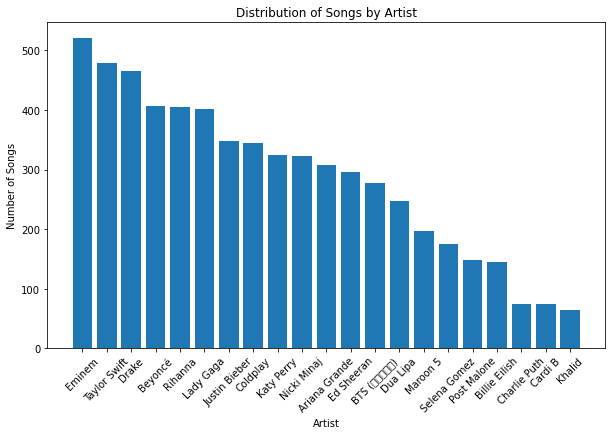

In [7]:
artist_counts = df['Artist'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(artist_counts.index, artist_counts.values)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Artist')
plt.xticks(rotation=45)
plt.show()


In [8]:
df.isnull().sum()

Artist       0
Title        0
Lyric       46
Year      1749
Genre        0
dtype: int64

In [9]:
df[df['Lyric'].isnull()]

,Artist,Title,Lyric,Year,Genre
202,BTS (방탄소년단),Interlude,NaN,2013.0,Genre KPop
219,BTS (방탄소년단),Friends (Hoseok Theme),NaN,2019.0,Genre KPop
227,BTS (방탄소년단),Captain (Namjun Theme),NaN,2019.0,Genre KPop
228,BTS (방탄소년단),Cake Waltz (Jimin Theme),NaN,2019.0,Genre KPop
236,BTS (방탄소년단),Flying (Taehyung Theme),NaN,2019.0,Genre KPop
242,BTS (방탄소년단),Not Alone (Jeongguk Theme),NaN,2019.0,Genre KPop
248,BTS (방탄소년단),Shine (Yunki Theme),NaN,2019.0,Genre KPop
254,BTS (방탄소년단),Wish (Seok Jin Theme),NaN,2019.0,Genre KPop
68,Coldplay,Sunrise,NaN,2019.0,Genre Alternative Indie
115,Coldplay,Mylo Xyloto,NaN,2011.0,Genre Alternative Indie


In [10]:
df = df.dropna()
df.isnull().sum()

Artist    0
Title     0
Lyric     0
Year      0
Genre     0
dtype: int64

In [11]:
duplicates = df[df['Lyric'].duplicated()]
duplicates

,Artist,Title,Lyric,Year,Genre
313,Beyoncé,Get Me Bodied (Live),948 b'day mission one i'ma put this on when ...,2009.0,Genre R&B Pop
320,Beyoncé,Naughty Girl Medley (The Beyonce Experience Live),i love to love you baby i love to love you bab...,2007.0,Genre R&B Pop
347,Beyoncé,Freakum Dress (Live),to be or not to be not hold up bring the beat ...,2010.0,Genre R&B Pop
374,Beyoncé,Welcome to Hollywood (Beyoncé Experience Live),jayz beyoncé it ain't for everybody uhh welco...,2007.0,Genre R&B Pop
103,Billie Eilish,Bitches broken hearts[killer frost remix],you can pretend you don't miss me me you can p...,2018.0,Genre Alternative Indie
...,...,...,...,...,...
113,Selena Gomez,Kill Em with Kindness (Felix Cartal Remix),the world can be a nasty place you know it i k...,2016.0,Genre Pop
143,Selena Gomez,Kill Em with Kindness (River Tiber Remix),the world can be a nasty place you know it i k...,2016.0,Genre Pop
148,Selena Gomez,Kill Em with Kindness (Young Bombs Remix),the world can be a nasty place you know it i k...,2016.0,Genre Pop
171,Selena Gomez,Come & Get It (DJ M3 Mixshow Extended Remix),when you're ready come and get it nananana nan...,2013.0,Genre Pop


In [12]:
merged1 = df.merge(duplicates, indicator=True, how='left')
df = merged1[merged1['_merge'] == 'left_only'].drop(columns='_merge')
df

,Artist,Title,Lyric,Year,Genre
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,Genre Pop
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,Genre Pop
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,Genre Pop
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,Genre Pop
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,Genre Pop
...,...,...,...,...,...
4242,Taylor Swift,Rare Peer (Brenda Lee Tribute),i'm curled up in my mother's bed staring inten...,2017.0,Genre Pop Country
4243,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,Genre Pop Country
4244,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,Genre Pop Country
4245,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,Genre Pop Country


In [13]:
for words in df.columns:
    df['lyrics_word'] = df['Lyric'].str.split().apply(len)
df

,Artist,Title,Lyric,Year,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,Genre Pop,500
...,...,...,...,...,...,...
4242,Taylor Swift,Rare Peer (Brenda Lee Tribute),i'm curled up in my mother's bed staring inten...,2017.0,Genre Pop Country,483
4243,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,Genre Pop Country,349
4244,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,Genre Pop Country,287
4245,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,Genre Pop Country,142


In [14]:
def filter_indexes(df):
    indexes = []
    c = 0

    def filter_lyrics_word(x):
        nonlocal c
        nonlocal indexes
        if x < 20:
            indexes.append(df.index[c])
        c += 1

    df['lyrics_word'].apply(filter_lyrics_word)

    return indexes, c


# Example usage
indexes, count = filter_indexes(df)
print(indexes)
print(count)

[136, 221, 236, 240, 412, 448, 490, 565, 574, 829, 849, 850, 876, 1104, 1152, 1516, 1575, 1576, 1663, 1739, 1746, 1917, 1943, 1944, 2205, 2330, 2339, 2341, 2343, 2528, 2994, 3003, 3009, 3344, 3345, 3346, 3732, 3858, 3869, 3885, 3894, 3899]
4181


In [15]:
x = df.iloc[indexes]
x

,Artist,Title,Lyric,Year,Genre,lyrics_word
136,Ariana Grande,​you,lyrics for this song have yet to be released p...,2018.0,Genre Pop,18
221,Ariana Grande,Honesty,snippet dont talk back feel the honesty,2010.0,Genre Pop,7
236,Ariana Grande,Shhh,shhh baby before u get aroused,2021.0,Genre Pop,6
240,Ariana Grande,Love Boy,love boy yeah you such a love boy,2021.0,Genre Pop,8
412,Beyoncé,​come home (nala interlude),nala you have to come home we've really needed...,2019.0,Genre R&B Pop,13
448,Beyoncé,Eclipse,lyrics for this song have yet to be released p...,2020.0,Genre R&B Pop,18
493,Beyoncé,Speechless (Beyoncé Experience Live),you've got me you've got me you've got me you'...,2007.0,Genre R&B Pop,280
569,Billie Eilish,​party favor (Mahogany Sessions),hey call me back when ya get this or when you...,2018.0,Genre Alternative Indie,208
578,Billie Eilish,Bury a friend (Zeds Dead Remix),crooks billie billie eilish what do you want...,2019.0,Genre Alternative Indie,428
840,BTS (방탄소년단),Just One Day (Japanese Ver.),kanji yeah yeah yeah just one day one night t...,2014.0,Genre KPop,1438


In [16]:
def filter_dataframe(df, indexes):
    filtered_df = df.loc[indexes]

    merged = df.merge(x, indicator=True, how='left')
    df = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')

    return df

filtered_df = filter_dataframe(df, indexes)
df = filtered_df
df.head()

,Artist,Title,Lyric,Year,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,Genre Pop,500


In [17]:
df['lyrics_word'].describe()

count    4139.000000
mean      420.545542
std       306.796190
min         1.000000
25%       256.000000
50%       366.000000
75%       513.500000
max      5768.000000
Name: lyrics_word, dtype: float64

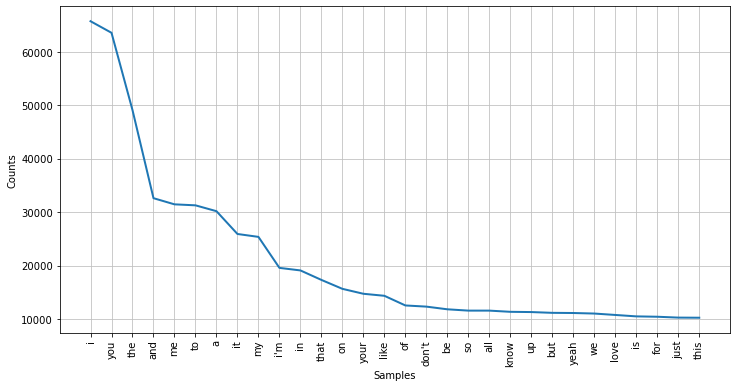

In [18]:
all_lyrics = ' '.join(df['Lyric'])
tokens = all_lyrics.split()
freq_dist = FreqDist(tokens)
plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)
plt.show()

Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

<Figure size 864x432 with 0 Axes>

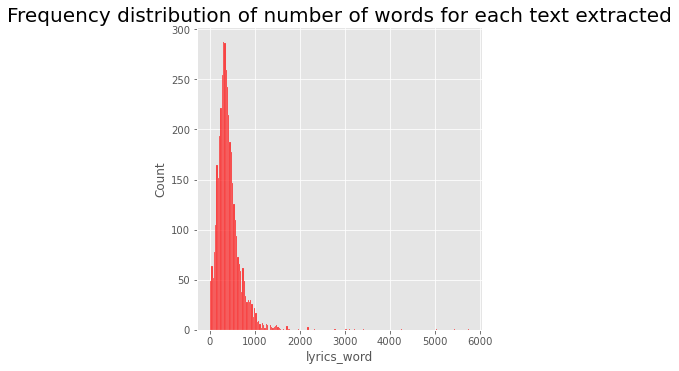

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
sns.displot(df['lyrics_word'], kde=False, color="red", bins=200)
plt.title("Frequency distribution of number of words for each text extracted", size=20)

In [22]:
def strip_html(text):
    return re.sub(r'<.*?>', '', text)                  

df['Lyric'] = df['Lyric'].apply(strip_html)
df

,Artist,Title,Lyric,Year,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,Genre Pop,500
...,...,...,...,...,...,...
4176,Taylor Swift,Rare Peer (Brenda Lee Tribute),i'm curled up in my mother's bed staring inten...,2017.0,Genre Pop Country,483
4177,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,Genre Pop Country,349
4178,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,Genre Pop Country,287
4179,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,Genre Pop Country,142


In [23]:
def convert_to_lowercase(text):
    return text.lower()

df['Lyric'] = df['Lyric'].apply(convert_to_lowercase)
df

,Artist,Title,Lyric,Year,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,2018.0,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,2019.0,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,2016.0,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,2018.0,Genre Pop,500
...,...,...,...,...,...,...
4176,Taylor Swift,Rare Peer (Brenda Lee Tribute),i'm curled up in my mother's bed staring inten...,2017.0,Genre Pop Country,483
4177,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...,2008.0,Genre Pop Country,349
4178,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,2008.0,Genre Pop Country,287
4179,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,Genre Pop Country,142


In [24]:
import re

def special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)
                  
df['Lyric'] = df['Lyric'].apply(special_chars)
df

,Artist,Title,Lyric,Year,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought id end up with sean but he wasnt a mat...,2018.0,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffanys and bottles of bubb...,2019.0,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive been here all n...,2016.0,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now im in a state of mind i wanna be in ...,2018.0,Genre Pop,500
...,...,...,...,...,...,...
4176,Taylor Swift,Rare Peer (Brenda Lee Tribute),im curled up in my mothers bed staring intentl...,2017.0,Genre Pop Country,483
4177,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,its strange to think the songs we used to sing...,2008.0,Genre Pop Country,349
4178,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he wont see...,2008.0,Genre Pop Country,287
4179,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,Genre Pop Country,142


In [25]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
def tokenizewords(text):
    return ' '.join(word_tokenize(text))

                  
df['Lyric'] = df['Lyric'].apply(tokenizewords)
df

,Artist,Title,Lyric,Year,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought id end up with sean but he wasnt a mat...,2018.0,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffanys and bottles of bubb...,2019.0,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,2018.0,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive been here all ni...,2016.0,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now im in a state of mind i wan na be in...,2018.0,Genre Pop,500
...,...,...,...,...,...,...
4176,Taylor Swift,Rare Peer (Brenda Lee Tribute),im curled up in my mothers bed staring intentl...,2017.0,Genre Pop Country,483
4177,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,its strange to think the songs we used to sing...,2008.0,Genre Pop Country,349
4178,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he wont see...,2008.0,Genre Pop Country,287
4179,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,2020.0,Genre Pop Country,142


In [26]:
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in sw_list])

                  
df['Lyric'] = df['Lyric'].apply(remove_stopwords)
df

,Artist,Title,Lyric,Year,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought id end sean wasnt match wrote songs ri...,2018.0,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast tiffanys bottles bubbles girls ...,2019.0,Genre Pop,490
2,Ariana Grande,​God is a woman,love move love touch one said done youll belie...,2018.0,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive night ariana ive...,2016.0,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right im state mind wan na like time aint got ...,2018.0,Genre Pop,500
...,...,...,...,...,...,...
4176,Taylor Swift,Rare Peer (Brenda Lee Tribute),im curled mothers bed staring intently laptop ...,2017.0,Genre Pop Country,483
4177,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,strange think songs used sing smiles flowers e...,2008.0,Genre Pop Country,349
4178,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks fake smile wont see want im needing...,2008.0,Genre Pop Country,287
4179,Taylor Swift,Evermore [Forward],put plainly couldnt stop writing songs try put...,2020.0,Genre Pop Country,142


In [27]:
df.iloc[0]

Artist                                             Ariana Grande
Title                                             ​thank u, next
Lyric          thought id end sean wasnt match wrote songs ri...
Year                                                      2018.0
Genre                                                  Genre Pop
lyrics_word                                                  463
Name: 0, dtype: object

In [28]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemm = WordNetLemmatizer()
def lemmatizewords(text):
    return ' '.join([lemm.lemmatize(word) for word in text.split()])

df['Lyric'] = df['Lyric'].apply(lemmatizewords)
df

[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


,Artist,Title,Lyric,Year,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought id end sean wasnt match wrote song ric...,2018.0,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast tiffany bottle bubble girl tatt...,2019.0,Genre Pop,490
2,Ariana Grande,​God is a woman,love move love touch one said done youll belie...,2018.0,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive night ariana ive...,2016.0,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right im state mind wan na like time aint got ...,2018.0,Genre Pop,500
...,...,...,...,...,...,...
4176,Taylor Swift,Rare Peer (Brenda Lee Tribute),im curled mother bed staring intently laptop i...,2017.0,Genre Pop Country,483
4177,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,strange think song used sing smile flower ever...,2008.0,Genre Pop Country,349
4178,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew look fake smile wont see want im needing ...,2008.0,Genre Pop Country,287
4179,Taylor Swift,Evermore [Forward],put plainly couldnt stop writing song try put ...,2020.0,Genre Pop Country,142


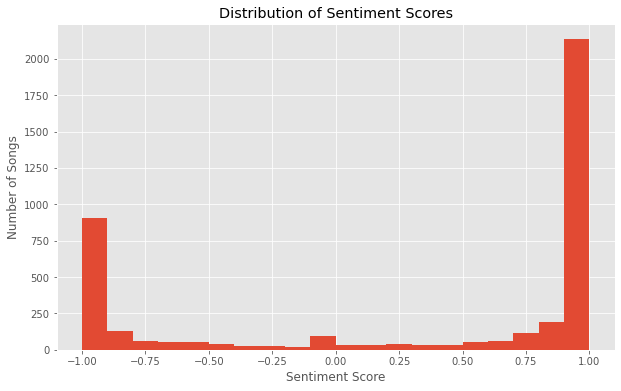

In [29]:
sia = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Lyric'].apply(lambda x: sia.polarity_scores(x)['compound'])
plt.figure(figsize=(10, 6))
plt.hist(df['Sentiment_Score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Songs')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [30]:
df['Lyric'].describe()

count                                                  4139
unique                                                 4099
top       look star look shine everything yeah yellow ca...
freq                                                      4
Name: Lyric, dtype: object

In [34]:
text_as_list = []
frequencies = {}
uncommon_words = set()

MIN_FREQUENCY = 7
MIN_SEQ = 5
BATCH_SIZE =  32

def extract_text(text):
    global text_as_list
    text_as_list += [w for w in text.split(' ') if w.strip() != '' or w == '\n']

df['Lyric'].apply( extract_text )

for w in text_as_list:
    frequencies[w] = frequencies.get(w, 0) + 1

uncommon_words = set([key for key in frequencies.keys() if frequencies[key] < MIN_FREQUENCY])

words = sorted(set([key for key in frequencies.keys() if frequencies[key] >= MIN_FREQUENCY]))


num_words = len(words)

word_indices = dict((w, i) for i, w in enumerate(words))

indices_word = dict((i, w) for i, w in enumerate(words))

print('Words with less than {} appearances: {}'.format( MIN_FREQUENCY, len(uncommon_words)))

print('Words with more than {} appearances: {}'.format( MIN_FREQUENCY, len(words)))

valid_seqs = []

end_seq_words = []

for i in range(len(text_as_list) - MIN_SEQ ):
    end_slice = i + MIN_SEQ + 1

    if len( set(text_as_list[i:end_slice]).intersection(uncommon_words) ) == 0:
        valid_seqs.append(text_as_list[i: i + MIN_SEQ])
        end_seq_words.append(text_as_list[i + MIN_SEQ])

print('Valid sequences of size {}: {}'.format(MIN_SEQ, len(valid_seqs)))
df.head()

Words with less than 7 appearances: 24943
Words with more than 7 appearances: 7728
Valid sequences of size 5: 746982


,Artist,Title,Lyric,Year,Genre,lyrics_word,Sentiment_Score
0,Ariana Grande,"​thank u, next",thought id end sean wasnt match wrote song ric...,2018.0,Genre Pop,463,0.9994
1,Ariana Grande,7 rings,yeah breakfast tiffany bottle bubble girl tatt...,2019.0,Genre Pop,490,0.9973
2,Ariana Grande,​God is a woman,love move love touch one said done youll belie...,2018.0,Genre Pop,439,0.9987
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive night ariana ive...,2016.0,Genre Pop,551,-0.6217
4,Ariana Grande,​​no tears left to cry,right im state mind wan na like time aint got ...,2018.0,Genre Pop,500,0.9740


In [35]:
valid_seqs[:5]

[['thought', 'id', 'end', 'sean', 'wasnt'],
 ['id', 'end', 'sean', 'wasnt', 'match'],
 ['end', 'sean', 'wasnt', 'match', 'wrote'],
 ['sean', 'wasnt', 'match', 'wrote', 'song'],
 ['wasnt', 'match', 'wrote', 'song', 'ricky']]

In [36]:
end_seq_words[:5]

['match', 'wrote', 'song', 'ricky', 'listen']

In [37]:
import pandas as pd

# Define the functions to create the columns
def extract_valid_seqs(text):
    valid_seqs = []
    end_seq_words = []
    text_as_list = []

    MIN_FREQUENCY = 7
    MIN_SEQ = 5

    def extract_text(text):
        nonlocal text_as_list
        text_as_list += [w for w in text.split(' ') if w.strip() != '' or w == '\n']

    extract_text(text)

    frequencies = {}
    uncommon_words = set()

    for w in text_as_list:
        frequencies[w] = frequencies.get(w, 0) + 1

    uncommon_words = set([key for key in frequencies.keys() if frequencies[key] < MIN_FREQUENCY])

    for i in range(len(text_as_list) - MIN_SEQ):
        end_slice = i + MIN_SEQ + 1

        if len(set(text_as_list[i:end_slice]).intersection(uncommon_words)) == 0:
            valid_seqs.append(text_as_list[i: i + MIN_SEQ])
            end_seq_words.append(text_as_list[i + MIN_SEQ])

    return valid_seqs


def extract_end_seq_words(text):
    valid_seqs = []
    end_seq_words = []
    text_as_list = []

    MIN_FREQUENCY = 7
    MIN_SEQ = 5

    def extract_text(text):
        nonlocal text_as_list
        text_as_list += [w for w in text.split(' ') if w.strip() != '' or w == '\n']

    extract_text(text)

    frequencies = {}
    uncommon_words = set()

    for w in text_as_list:
        frequencies[w] = frequencies.get(w, 0) + 1

    uncommon_words = set([key for key in frequencies.keys() if frequencies[key] < MIN_FREQUENCY])

    for i in range(len(text_as_list) - MIN_SEQ):
        end_slice = i + MIN_SEQ + 1

        if len(set(text_as_list[i:end_slice]).intersection(uncommon_words)) == 0:
            valid_seqs.append(text_as_list[i: i + MIN_SEQ])
            end_seq_words.append(text_as_list[i + MIN_SEQ])

    return end_seq_words


# Apply the functions to create the columns
df["valid_seqs"] = df["Lyric"].apply(extract_valid_seqs)
df["end_seq_words"] = df["Lyric"].apply(extract_end_seq_words)

# Display the updated DataFrame
df


,Artist,Title,Lyric,Year,Genre,lyrics_word,Sentiment_Score,valid_seqs,end_seq_words
0,Ariana Grande,"​thank u, next",thought id end sean wasnt match wrote song ric...,2018.0,Genre Pop,463,0.9994,"[[say, thank, next, next, thank], [thank, next...","[next, next, thank, next, im, fuckin, next, th..."
1,Ariana Grande,7 rings,yeah breakfast tiffany bottle bubble girl tatt...,2019.0,Genre Pop,490,0.9973,"[[like, want, got, yeah, want], [want, got, ye...","[got, want, got, want, got, want, got, like, w..."
2,Ariana Grande,​God is a woman,love move love touch one said done youll belie...,2018.0,Genre Pop,439,0.9987,"[[done, youll, believe, god, woman], [done, yo...","[yeah, yeah, yeah, god, woman, yeah, yeah, god..."
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive night ariana ive...,2016.0,Genre Pop,551,-0.6217,"[[cause, ariana, grande, ive, night], [ariana,...","[ive, day, boy, got, walkin, side, side, ive, ..."
4,Ariana Grande,​​no tears left to cry,right im state mind wan na like time aint got ...,2018.0,Genre Pop,500,0.9740,"[[aint, got, tear, left, cry], [got, tear, lef...","[im, pickin, pickin, im, lovin, im, livin, im,..."
...,...,...,...,...,...,...,...,...,...
4176,Taylor Swift,Rare Peer (Brenda Lee Tribute),im curled mother bed staring intently laptop i...,2017.0,Genre Pop Country,483,0.9956,[],[]
4177,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,strange think song used sing smile flower ever...,2008.0,Genre Pop Country,349,-0.0880,[],[]
4178,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew look fake smile wont see want im needing ...,2008.0,Genre Pop Country,287,0.9712,[],[]
4179,Taylor Swift,Evermore [Forward],put plainly couldnt stop writing song try put ...,2020.0,Genre Pop Country,142,0.9441,[],[]


In [38]:
# Remove rows with empty lists in valid_seqs and end_seq_words columns
df = df.drop(df[df['valid_seqs'].apply(lambda x: len(x) == 0)].index)
df = df.drop(df[df['end_seq_words'].apply(lambda x: len(x) == 0)].index)

#df = df.sample(n=4100, weights='Number_of_words', random_state=1)


In [39]:
# Function to flatten and convert a list of words to text
def flatten_and_convert_to_text(word_list):
    flattened_text = ''
    for item in word_list:
        if isinstance(item, list):
            flattened_text += flatten_and_convert_to_text(item) + ' '
        else:
            flattened_text += item + ' '
    return flattened_text.strip()

# Apply the flatten_and_convert_to_text function to the 'valid_seqs' and 'end_seq_words' columns
df['valid_seqs'] = df['valid_seqs'].apply(flatten_and_convert_to_text)
df['end_seq_words'] = df['end_seq_words'].apply(flatten_and_convert_to_text)

# Print the modified DataFrame
df

,Artist,Title,Lyric,Year,Genre,lyrics_word,Sentiment_Score,valid_seqs,end_seq_words
0,Ariana Grande,"​thank u, next",thought id end sean wasnt match wrote song ric...,2018.0,Genre Pop,463,0.9994,say thank next next thank thank next next than...,next next thank next im fuckin next thank next...
1,Ariana Grande,7 rings,yeah breakfast tiffany bottle bubble girl tatt...,2019.0,Genre Pop,490,0.9973,like want got yeah want want got yeah want got...,got want got want got want got like want got w...
2,Ariana Grande,​God is a woman,love move love touch one said done youll belie...,2018.0,Genre Pop,439,0.9987,done youll believe god woman done youll believ...,yeah yeah yeah god woman yeah yeah god woman y...
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive night ariana ive...,2016.0,Genre Pop,551,-0.6217,cause ariana grande ive night ariana grande iv...,ive day boy got walkin side side ive night ive...
4,Ariana Grande,​​no tears left to cry,right im state mind wan na like time aint got ...,2018.0,Genre Pop,500,0.9740,aint got tear left cry got tear left cry im te...,im pickin pickin im lovin im livin im pickin i...
...,...,...,...,...,...,...,...,...,...
4155,Taylor Swift,Everything Has Changed (Remix),ed sheeran good go taylor swift knew morning w...,2013.0,Genre Pop Country,479,0.9977,taylor swift ed sheeran wan swift ed sheeran w...,na know better know better know better wan na ...
4160,Taylor Swift,Mean (Live/2011),word like knife sword weapon use knocked foot ...,2011.0,Genre Pop Country,402,0.1979,youre ever gon na mean ever gon na mean someda...,someday ill big got ta mean someday ill big go...
4166,Taylor Swift,Christmas Tree Farm (Recorded Live at the 2019...,spoken jingleball there santa hat everywhere y...,2020.0,Genre Pop Country,338,0.9976,oh baby baby merry christmas baby baby merry c...,oh baby baby merry christmas oh baby baby merr...
4168,Taylor Swift,Should’ve Said No (Live from SoHo),shouldve said shouldve gone home shouldve thou...,2008.0,Genre Pop Country,389,0.5037,get back get back shouldve get back get back s...,back back back


In [40]:
# Concatenate all text columns
all_text = pd.concat([df['Artist'], df['Genre'], df['valid_seqs'], df['end_seq_words']], ignore_index=True)

# Define the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(all_text)

# Define the maximum sequence length
max_sequence_length = 100  # Example value, adjust as per your data

# Define the scaler for numerical columns
scaler = StandardScaler()

# Fit the scaler on the numerical data
numerical_data = df[['Year', 'lyrics_word']]  # Replace 'df' with your dataset
scaler.fit(numerical_data)

# Define the transformers for text and numerical columns
def transform_text(x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=max_sequence_length)

def transform_numerical(x):
    return scaler.transform(x)

In [41]:
# Create the preprocessed data
X_text = df[['Artist', 'Genre', 'valid_seqs']].apply(lambda x: ' '.join(x), axis=1)
X_text = transform_text(X_text)
X_numerical = transform_numerical(df[['Year', 'lyrics_word']])

# Combine the preprocessed text and numerical data
X = np.concatenate([X_text, X_numerical], axis=1)

# Create the target data
y = transform_text(df['end_seq_words'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
y_train[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38,   7,  10, 956, 129, 129, 956, 129, 129,
        956, 129,  10, 956, 129, 956, 129, 956, 129],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  86,  66,   7,  26,  30,  22,  28,  30,  22,  30,  22,  86,
         86,  66,   7,   1, 365,   1,  58,  19, 365,  86,  86,  66,   7,
         86,  86,  66,   7,  86,  86,  66,   7,  26,  30,  22,  28,  30,
         22,  30,  22,  86,  86,  66,   7,   1, 365,   1,  58,  19, 365,
         86,  86,  66,   7, 365,  86,  86,  66,   7,   1, 365,   1,  5

In [43]:
y_test[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    2,  764,    5,  166, 1325,    5,  166,  166,
           3,  166,  764,    5,  166, 1325,    5,  166,    2,  764,    5,
         166, 1325,    5,  166,  166,  764,    5,  166, 1325,    5,  166,
           2,   17,  780,  764,    5,  166,  166,    2,  764,    5,  166,
        1325,    5,  166,  166,  166,  764,    5,  166, 1325,    5,  166,
           2,  764,    5,  166, 1325,    5,  166,  166,    2,  764,    5,
         166, 1325,    5,  166,  166,    2,  764,    5,  166, 1325,    5,
         166,   17,  780,  764,    5,  166,  764,    5,  166, 1325,    5,
         166],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [44]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate
from keras.models import Model
from keras.layers import TimeDistributed
from keras.layers import RepeatVector

# Get the vocabulary size
vocabulary_size = len(tokenizer.word_index) + 1

# Define the text input
text_input = Input(shape=(max_sequence_length,))
x = Embedding(input_dim=vocabulary_size, output_dim=50, input_length=max_sequence_length)(text_input)
x = LSTM(units=64, return_sequences=True)(x)

# Define the numerical input
numerical_input = Input(shape=(2,))
y = Dense(units=32, activation='relu')(numerical_input)
y = RepeatVector(max_sequence_length)(y) # Repeat the Dense layer's output

# Concatenate the output of the two branches
combined = concatenate([x, y])

# Apply a TimeDistributed(Dense(...)) layer
output = TimeDistributed(Dense(units=vocabulary_size, activation='softmax'))(combined)

# Instantiate the model
model = Model(inputs=[text_input, numerical_input], outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 50)      116600      ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 32)           96          ['input_2[0][0]']                
                                                                                              

Epoch 1/10
60/60 [==============================] - 16s 175ms/step - loss: 5.5848 - accuracy: 0.5596 - val_loss: 3.1068 - val_accuracy: 0.6558
Epoch 2/10
60/60 [==============================] - 9s 151ms/step - loss: 2.9072 - accuracy: 0.6568 - val_loss: 2.9853 - val_accuracy: 0.6558
Epoch 3/10
60/60 [==============================] - 9s 150ms/step - loss: 2.8140 - accuracy: 0.6568 - val_loss: 2.9633 - val_accuracy: 0.6558
Epoch 4/10
60/60 [==============================] - 9s 149ms/step - loss: 2.7645 - accuracy: 0.6568 - val_loss: 2.9559 - val_accuracy: 0.6549
Epoch 5/10
60/60 [==============================] - 9s 149ms/step - loss: 2.7268 - accuracy: 0.6568 - val_loss: 2.9402 - val_accuracy: 0.6542
Epoch 6/10
60/60 [==============================] - 9s 149ms/step - loss: 2.6926 - accuracy: 0.6571 - val_loss: 2.9228 - val_accuracy: 0.6540
Epoch 7/10
60/60 [==============================] - 9s 149ms/step - loss: 2.6499 - accuracy: 0.6571 - val_loss: 2.8920 - val_accuracy: 0.6526
Epoch

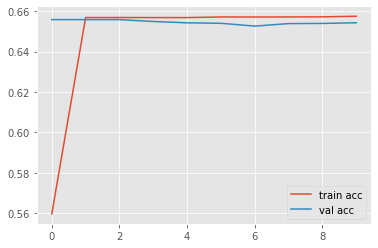

In [45]:
# Fit the model
X_train_text = X_train[:, :max_sequence_length]
X_train_numerical = X_train[:, max_sequence_length:]
X_test_text = X_test[:, :max_sequence_length]
X_test_numerical = X_test[:, max_sequence_length:]

from keras.utils import to_categorical

# Convert labels to categorical
y_train_categorical = to_categorical(y_train, num_classes=vocabulary_size)
y_test_categorical = to_categorical(y_test, num_classes=vocabulary_size)

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit([X_train_text, X_train_numerical], y_train_categorical, epochs=10, batch_size=32, validation_data=([X_test_text, X_test_numerical], y_test_categorical))

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [46]:
combined_data = np.concatenate((X_train, X_test), axis=0)
seed_index = np.random.randint(len(combined_data))
seed = combined_data[seed_index]

def generate_merged_text(seed_text, num_of_words, diversity, artist, genre, year):
    seed_tokens = tokenizer.texts_to_sequences([seed_text + artist + genre + year])
    seed_tokens = pad_sequences(seed_tokens, maxlen=max_sequence_length)

    numerical_inputs = scaler.transform([[year, num_of_words]])

    generated_text = seed_text

    for _ in range(num_of_words):
        prediction = model.predict([seed_tokens, numerical_inputs])
        prediction = prediction[0][-1]

        prediction /= np.sum(prediction)  # Normalize probabilities

        valid_indices = [idx for word, idx in tokenizer.word_index.items() if idx < len(prediction)]
        output_word_index = np.random.choice(valid_indices, p=prediction[valid_indices] / np.sum(prediction[valid_indices]))
        output_word = tokenizer.index_word.get(output_word_index, '')

        generated_text += ' ' + output_word

        seed_tokens = np.append(seed_tokens[:, 1:], [[output_word_index]], axis=1)

    return generated_text

generated_lyrics = generate_merged_text("I am lonely, I am feeling very sad today", num_of_words=200, diversity=0.5, artist="Ariana Grande", genre="Pop", year="2018")
print(generated_lyrics)


1/1 [==============================] - 0s 24ms/step
I am lonely, I am feeling very sad today vision nothing eilish im na giving want mad wow dont id goooo got damn ill dont get go respect hopeless count hurt ooh nasty im get na next go know breathin waitin taehyung la va pharrell right wait christmas yeah ah dont plan right im yeah present back need imagine ahhh tonight swift without go need forever oh youre love wow fine theyll eden id ah oh away lose stay baby fine juda could yeah ooh yo know like well tell thinkin make gossip hey one brown see asking woo together nothing denim estou light ka heart wont love need woo love oh wo cant oh body starlight im swan car love im tell mad dont come ooh loop next imagine voodoo love need oh fucker oh yeah woowoo momomomonster yeah wait im rain vu im love guess coco hoo everybody live survivor starlight got meet knock yeah hoo oh ay cause know ah na walk kiss say home count hey come night bang problem bout lose dont bout oh like yeah ooh ooh som

In [47]:
import matplotlib.pyplot as plt
import random
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

def calculate_bleu_score(reference, generated):
    reference = [reference.split()]
    generated = generated.split()
    return sentence_bleu(reference, generated)

def calculate_meteor_score(reference, generated):
    return meteor_score([reference], generated)

reference_lyrics = random.choice(df['Lyric'])

bleu_score = calculate_bleu_score(reference_lyrics, generated_lyrics)
meteor_score = calculate_meteor_score(reference_lyrics, generated_lyrics)

print("BLEU Score:", bleu_score)
print("METEOR Score:", meteor_score)

C:\Users\ASUS\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\ASUS\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\ASUS\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.

BLEU Score: 5.223742606094454e-232
METEOR Score: 0.1131339401820546


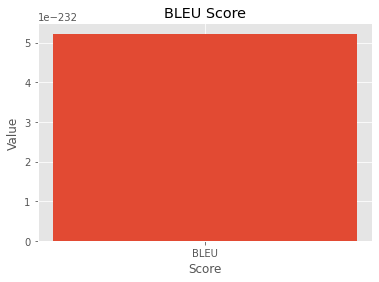

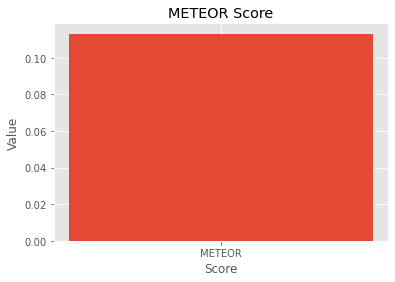

In [48]:
# Plotting BLEU score
plt.bar('BLEU', bleu_score)
plt.xlabel('Score')
plt.ylabel('Value')
plt.title('BLEU Score')
plt.show()

# Plotting METEOR score
plt.bar('METEOR', meteor_score)
plt.xlabel('Score')
plt.ylabel('Value')
plt.title('METEOR Score')
plt.show()

In [49]:
import textblob
from enchant.checker import SpellChecker

def correct_spelling(paragraph):
    # Use textblob for initial spell checking
    blob = textblob.TextBlob(paragraph)
    corrected_paragraph = blob.correct()

    # Use enchant as a fallback for words that may not be corrected properly
    checker = SpellChecker("en_US")
    checked_paragraph = []

    # Iterate over the corrected words and check for spelling errors
    for word in corrected_paragraph.words:
        if checker.check(word):
            checked_paragraph.append(word)
        else:
            suggestions = checker.suggest(word)
            if suggestions:
                checked_paragraph.append(suggestions[0])
            else:
                checked_paragraph.append(word)

    return " ".join(checked_paragraph)

# Example usage
corrected_paragraph = correct_spelling(generated_lyrics)
print(corrected_paragraph)


I am lonely I am feeling very sad today vision nothing english in an giving want mad now font id good got damn ill font get go respect hopeless count hurt ooh nasty in get an next go know breathing waiting Taichung la VA Harrell right wait Christmas yeah ah font plan right in yeah present back need imagine ah tonight swift without go need forever oh your love now fine they dene id ah oh away lose stay baby fine Judy could yeah ooh to know like well tell thinking make gossip hey one brown see asking who together nothing dines stop light ka heart wont love need who love oh wo can oh body starlight in swan car love in tell mad font come ooh loop next imagine voodoo love need oh pucker oh yeah woo woo monster yeah wait in rain be in love guess cock how everybody live survivor starlight got meet knock yeah how oh ya cause know ah an walk kiss say home count hey come night bang problem bout lose font bout oh like yeah ooh ooh sometimes in back back that nowhere dream ruin diamond hah forget 

In [54]:
import random

def capitalize_lines(text):
    lines = text.split("\n")
    capitalized_lines = [line.capitalize() for line in lines]
    return "\n".join(capitalized_lines)

def generate_lyrics(input_lyrics, number_of_words):
    # Create a list of words from the input lyrics
    words = input_lyrics.split(' ')
    
    # Create a Markov chain model
    markov_model = {}
    for i in range(1, len(words)):
        if words[i-1] not in markov_model:
            # If the word is not already in the model, add it
            markov_model[words[i-1]] = [words[i]]
        else:
            # If the word is already in the model, append the following word to the list
            markov_model[words[i-1]].append(words[i])
    
    # Choose a random word from the input lyrics to start the new lyrics
    current_word = random.choice(list(markov_model.keys()))
    new_lyrics = current_word.capitalize()

    # Generate the lyrics
    for i in range(number_of_words):
        if current_word not in markov_model:
            break
        next_word = random.choice(markov_model[current_word])
        new_lyrics += ' ' + next_word
        current_word = next_word

    return new_lyrics

song = generate_lyrics(corrected_paragraph, len(corrected_paragraph))

markov_song = capitalize_lines(song)

print(markov_song)

Yeah ah font plan right in an giving want mad now fine they dene id good got meet knock yeah wait in get go know like yeah ah font get an happening ya oh an next go know breathing waiting taichung la va harrell right in back that nowhere dream ruin diamond hah forget focus nowhere night moonlight ta hopeless feel daring home count hurt ooh to know like well tell mad now fine judy could yeah present back need who love oh wo can oh yeah wait christmas yeah how oh yeah ooh nasty in love need forever oh yeah how oh like yeah woo woo woo monster yeah wait christmas yeah woo monster yeah wait in back that nowhere night moonlight ta hopeless feel daring home count hurt ooh ooh sometimes in swan car love now font come night moonlight ta hopeless count hurt ooh ooh nasty in rain be in yeah present back need imagine voodoo love in back need oh like well tell thinking make gossip hey one brown see asking who love need oh pucker oh an happening ya cause know like well tell mad font come night moon

In [55]:
import random
import nltk
from nltk.corpus import cmudict

nltk.download('cmudict')
pronouncing_dict = cmudict.dict()

def get_rhyming_words(word, level=1):
    word = word.lower()
    pronunciations = pronouncing_dict.get(word)
    rhyming_words = []

    if pronunciations:
        for w, pron in pronouncing_dict.items():
            if pron[0][-level:] == pronunciations[0][-level:]:
                rhyming_words.append(w)

    return rhyming_words

def expand_lyrics(words):
    expanded_lyrics = words.copy()
    for word in words:
        rhyming_words = get_rhyming_words(word)
        if rhyming_words:
            random_word = random.choice(rhyming_words)
            expanded_lyrics.append(random_word)
    return expanded_lyrics

def generate_verse(lyrics):
    verse = []
    verse.append(lyrics)
    verse.append("")  
    return "\n".join(verse)

def generate_chorus(lyrics):
    chorus = []
    chorus.append(lyrics)
    chorus.append("")  
    return "\n".join(chorus)

def generate_bridge(lyrics):
    bridge = []
    bridge.append(lyrics)
    bridge.append("")  
    return "\n".join(bridge)

def generate_song(words, rhyme_scheme, verse_length, chorus_length, bridge_length):
    song_parts = []
    lyrics_idx = 0
    rhyme_idx = 0

    while lyrics_idx < len(words):
        if lyrics_idx + verse_length <= len(words) and rhyme_scheme[rhyme_idx] == 'A':
            verse_lyrics = " ".join(words[lyrics_idx:lyrics_idx + verse_length])
            song_parts.append(generate_verse(verse_lyrics))
            lyrics_idx += verse_length
        elif lyrics_idx + chorus_length <= len(words) and rhyme_scheme[rhyme_idx] == 'B':
            chorus_lyrics = " ".join(words[lyrics_idx:lyrics_idx + chorus_length])
            song_parts.append(generate_chorus(chorus_lyrics))
            lyrics_idx += chorus_length
        elif lyrics_idx + bridge_length <= len(words) and rhyme_scheme[rhyme_idx] == 'C' and bridge_length > 0:
            bridge_lyrics = " ".join(words[lyrics_idx:lyrics_idx + bridge_length])
            song_parts.append(generate_bridge(bridge_lyrics))
            lyrics_idx += bridge_length
        else:
            break  # add a break condition in case we can't increment lyrics_idx

        rhyme_idx = (rhyme_idx + 1) % len(rhyme_scheme)

    song = "\n".join(song_parts)
    return song

generated_lyrics = markov_song
words = generated_lyrics.split()

# words = expand_lyrics(words)

verse_length = 10
chorus_length = 6
bridge_length = 4  # add some length for the bridge for "ABABC" scheme
rhyme_scheme = "ABCAB"

song = generate_song(words, rhyme_scheme, verse_length, chorus_length, bridge_length)

formatted_song = capitalize_lines(song)

print(formatted_song)

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


Yeah ah font plan right in an giving want mad

Now fine they dene id good

Got meet knock yeah

Wait in get go know like yeah ah font get

An happening ya oh an next

Go know breathing waiting taichung la va harrell right in

Back that nowhere dream ruin diamond

Hah forget focus nowhere

Night moonlight ta hopeless feel daring home count hurt ooh

To know like well tell mad

Now fine judy could yeah present back need who love

Oh wo can oh yeah wait

Christmas yeah how oh

Yeah ooh nasty in love need forever oh yeah how

Oh like yeah woo woo woo

Monster yeah wait christmas yeah woo monster yeah wait in

Back that nowhere night moonlight ta

Hopeless feel daring home

Count hurt ooh ooh sometimes in swan car love now

Font come night moonlight ta hopeless

Count hurt ooh ooh nasty in rain be in yeah

Present back need imagine voodoo love

In back need oh

Like well tell thinking make gossip hey one brown see

Asking who love need oh pucker

Oh an happening ya cause know like well tell

In [56]:
model.save('model_SongAI_save.tf')

INFO:tensorflow:Assets written to: model_SongAI_save.tf\assets


INFO:tensorflow:Assets written to: model_SongAI_save.tf\assets


In [57]:
import pickle

# Save the tokenizer
with open('tokenizerSongAI.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [58]:
import pickle

# Save the scaler as a pickle file
with open('scalerSongAI.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [59]:
max_sequence_length

100